# Aprendizaje profundo / MLP con Early Stopping y Dropout (Core)
Descripción
MLP con Early Stopping y Dropout (Core)

Descripción:

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

Enlace al dataset: https://www.kaggle.com/ronitf/heart-disease-uci



Objetivo:

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.



Instrucciones:

1. Carga de datos:
- Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.
- Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

2. Exploración y preprocesamiento de datos:
- Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

3. Implementación de la MLP con Dropout:
- Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
- Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
- Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

4. Entrenamiento del modelo:
- Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
- Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

5. Evaluación del modelo:
- Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
- Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

In [46]:
#Todas las librerías que utilizo en el notebook
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart_disease_uci.csv')
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [48]:
print(df.info)

<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False

In [49]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [50]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [51]:
#Tenemos varios valores nulos, algunos son demasiados que si los elimino, perderé
#gran parte de los datos.
#Relleno los datos faltantes
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thal'] = df['thal'].fillna('unknown')

/var/folders/l6/w8_hsm8j2rj_265b844vwpqr0000gn/T/ipykernel_11067/1888886567.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])


In [52]:
print(df.isnull().sum())

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang       55
oldpeak      0
slope        0
ca           0
thal         0
num          0
dtype: int64


In [53]:
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

/var/folders/l6/w8_hsm8j2rj_265b844vwpqr0000gn/T/ipykernel_11067/3192975667.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


In [54]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [55]:
# Empiezo el modelo
#Tengo en cuenta que 0 es sin enfermedad cardiaca y los numeros indican diferentes grados
#de presencia de enfermedad cardiaca
#Entonces agruparé los datos en 0 y 1
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#La columna id me parece innecesaria
df = df.drop('id', axis=1)

#Convierto la columna num a binaria
df['num'] = df['num'].apply(lambda x:0 if x == 0 else 1)

#Separo los datos en categóricos y numéricos
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['number']).drop('num', axis = 1)

#Aplico One-Hot a las columnas categóricas
encoder = OneHotEncoder(sparse_output=False)
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoder.get_feature_names_out(df_cat.columns))

#Aplico StandardScaler a las columnas numéricas
escaler = StandardScaler()
df_num_scaled = escaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

#Ahora combino nuevamentas las categóricas y las numéricas y separo en X e Y
X = pd.concat([df_num_scaled, df_cat_encoded], axis = 1)
y = df['num'] #Mi variabe objetivo

#Divido el dataset en entrenamiento y en prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') #Capa de salida para la clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks = [early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100


/Users/mathiorti/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5531 - loss: 0.6746 - val_accuracy: 0.8108 - val_loss: 0.5041
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.5118 - val_accuracy: 0.8243 - val_loss: 0.4491
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4606 - val_accuracy: 0.8311 - val_loss: 0.4366
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.4052 - val_accuracy: 0.8243 - val_loss: 0.4217
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.4164 - val_accuracy: 0.8311 - val_loss: 0.4107
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4040 - val_accuracy: 0.8378 - val_loss: 0.3978
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.4031 - val_accuracy: 0.8446 - val_loss: 0.3974
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4317 - val_accuracy: 0.8446 - val_loss: 0.3

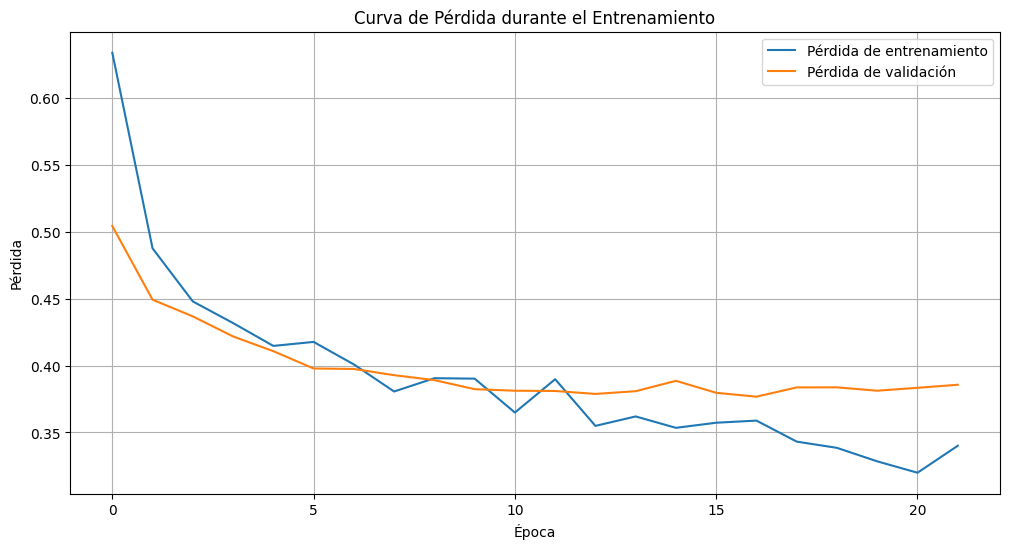

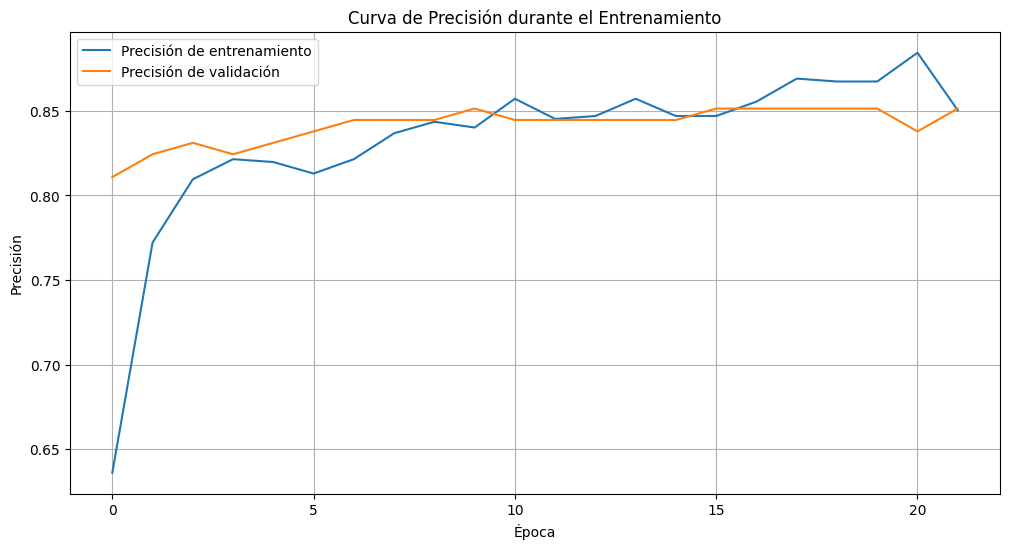

In [56]:
#Para las curvas de aprendizaje
import matplotlib.pyplot as plt

# Grafico las curvas de aprendizaje
# Graficar las curvas de aprendizaje: pérdida y precisión

# Pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


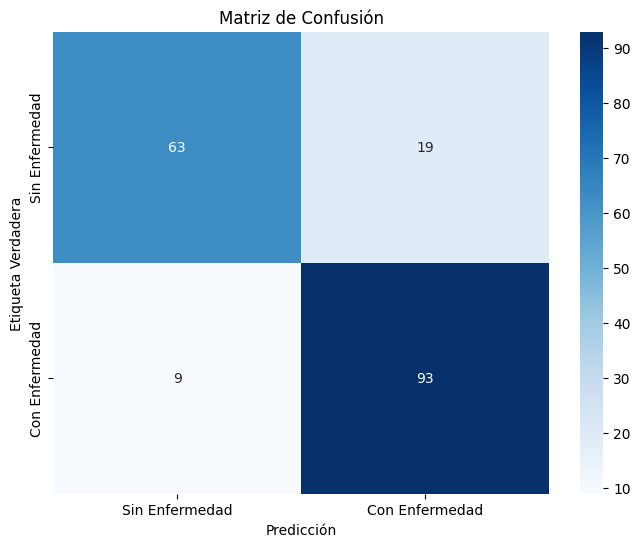

Reporte de Clasificación:
                precision    recall  f1-score   support

Sin Enfermedad       0.88      0.77      0.82        82
Con Enfermedad       0.83      0.91      0.87       102

      accuracy                           0.85       184
     macro avg       0.85      0.84      0.84       184
  weighted avg       0.85      0.85      0.85       184



In [57]:
#Evaluacion del modelo
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin Enfermedad', 'Con Enfermedad'], yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Sin Enfermedad', 'Con Enfermedad'])
print("Reporte de Clasificación:")
print(report)

# Conclusión 
El modelo tiene una precisión del 85 %, eso dice que clasifica correctamente el 85% de los casos.

Si analizo la curva de pérdida, la pérdida de entrenamiento disminuye constantemente, esto me indica que el modelo está aprendiendo los datos.

La pérdida de validación se estabiliza al pasar algunas épocas, esto me dice que Early Stopping funciona bien para evitar el sobreajuste.

Si analizo la curva de precisión, veo que la precisión de entrenamiento y de validación son parecidos, esto me dice que el modelo generaliza bien.

Si veo la matriz de confusión, me indica que el modelo es más preciso para identificar correctamente los pacientes con enfermedad cardíaca que a los que no lo tienen.

Con el reporte de clasificación veo que el modelo tiene un buen rendimiento en ambas clases, pero tiende a ser un poco menos eficaz en identificar correctamente a los pacientes sin enfermedad.

Entonces puedo decir que el modelo tiene un rendimiento sólido y una buena capacidad para generalizar a nuevos datos.


El uso de Dropout y Early Stopping en mi red neuronal porque mejora la capacidad de generalización al reducir el sobreajusto. Se evita el entrenamiento innecesario y se asegura que el modelo se detenga en el mejor punto de rendimiento. Con ambas técnicas puedo decir que hacen que mi modelo sea más eficiente que un MLP básico.